# Supervised Learning
- **Regression**: Input -> Continuous Value
- **Classification**: Input -> Discrete Value(Class, Label, Category, ...)

In [1]:
# 데이터 생성
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# 데이터 생성 --------------------------------
np.random.seed(seed=0) # 난수를 고정
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n) # 입력 데이터
T = np.zeros(X_n, dtype=np.uint8) # 목표 데이터
Dist_s = [0.4, 0.8] # 분포의 시작 지점
Dist_w = [0.8, 1.6] # 분포의 폭
Pi = 0.5 # 클래스 0의 비율
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi) # (A)
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] # (B)
# 데이터 표시 --------------------------------
print('X=' + str(np.round(X, 2)))
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


## How to choose Decision Boundary?
1. **Linear Regression**


2. **By Probability**
- Logistic Regression

## Logistic Regression, LR
$\textbf{Linear Model}$
- $y = w_0x+w_1$

$\textbf{Sigmoid Function}$
- $y = \sigma(x) = \cfrac{1}{1+e^{-x}}$

$\textbf{Logistic Regression Model}$
- $y = \sigma(w_0x+w_1) = \cfrac{1}{1+e^{-(w_0x+w_1)}}$

In [2]:
def logistic(x, w):
    y = 1/(1+np.exp(-(w[0]*x+w[1])))
    return y

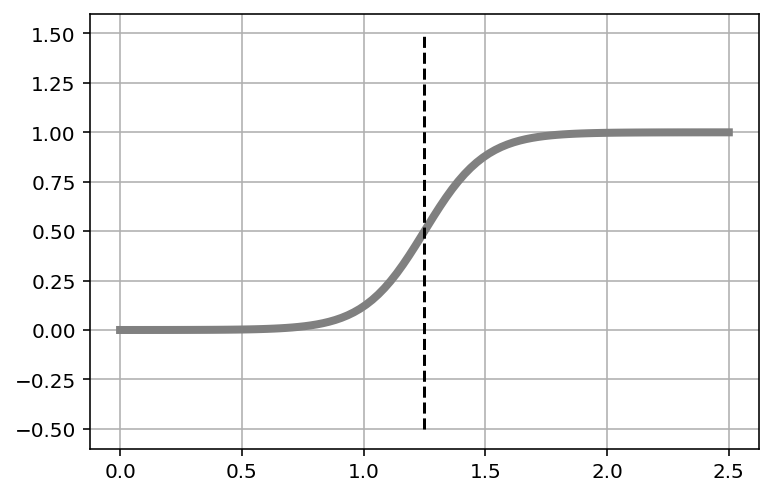

In [3]:
def show_logistic(ax, w):
    X = np.linspace(0, 2.5, 100)
    Y = logistic(X, w)
    ax.plot(X, Y, color='grey', linewidth=4)
    
    i = np.min(np.where(Y>0.5))
    B = (X[i-1] + X[i])/2
    ax.plot([B, B], [-.5, 1.5], color='k', linestyle='--')
    
    ax.grid()
    
if __name__=="__main__":
    w = [8, -10]
    ax = plt.gca()
    show_logistic(ax, w)

## Cross Entropy Error, CEE
$\textbf{Logistic Regression Model}$
- $y = \sigma(w_0x+w_1) = P(t=1|x)$

It can be transformed like
$ \qquad P(t|x) = y^t(1-y)^{1-t} \\
\qquad \rightarrow P(t=1|x) = y^1(1-y)^{1-1} = y$

$\textbf{Log Likelihood}$
N-dim X(data) and N-dim T(target)
$ \qquad P(\textbf{T}|\textbf{X}) = \prod\limits_{n=0}^{N-1}P(t_n|x_n) = \prod\limits_{n=0}^{N-1}y_n^{t_n}(1-y_n)^{1-t_n} \\
\qquad \rightarrow \log P(\textbf{T}|\textbf{X}) = \sum \limits_{n=0}^{N-1}\{t_n\log y_n+(1-t_n)\log (1-y_n)\}$

**Our Goal is to find w0 & w1 that maximize log likelihood.**

## Cross_Entropy error function
$E(\textbf{w}) = -\cfrac{1}{N}\log P(\textbf{T}|\textbf{X}) = -\cfrac{1}{N}\sum \limits_{n=0}^{N-1}\{t_n\log y_n+(1-t_n)\log (1-y_n)\}$

**Like MSE, Minimize $E(\textbf{w})$**

In [4]:
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee = -np.mean(t*np.log(y) + (1-t)*np.log(1-y))
    return cee

if __name__=="__main__":
    W = [1, 1]
    cee = cee_logistic(W, X, T)
    print(cee)

1.0288191541851066


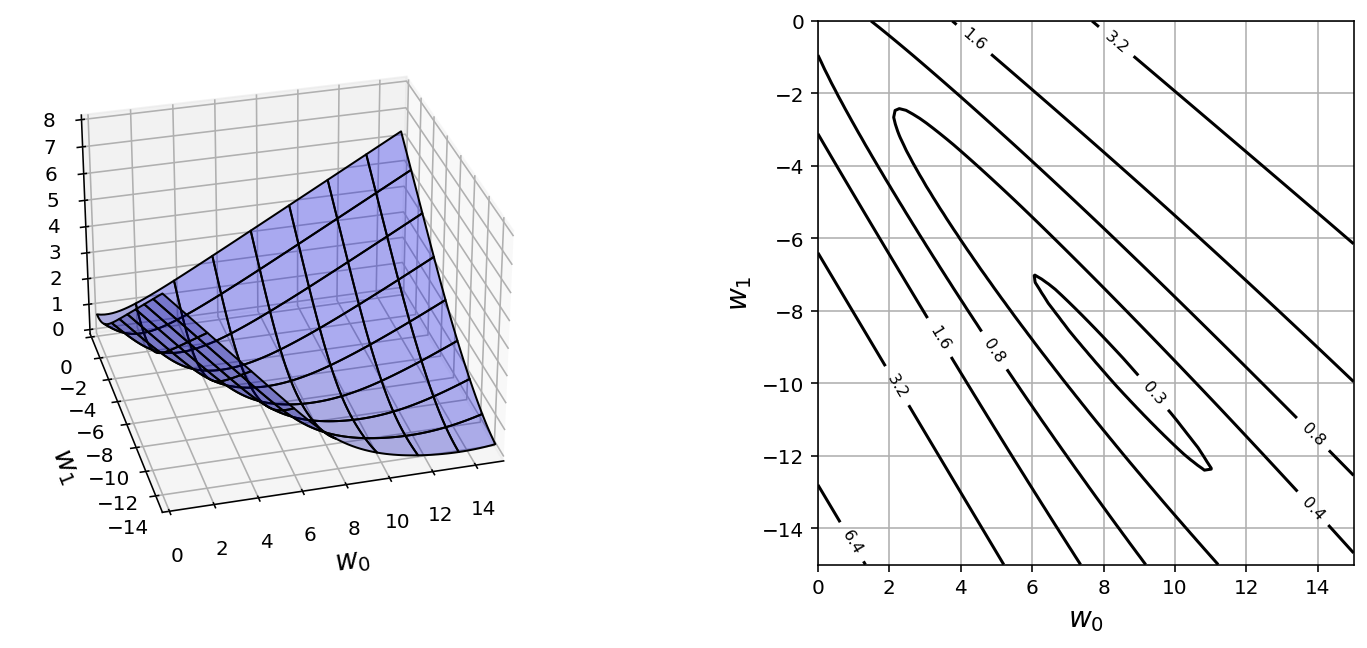

In [6]:
wn = 80
w_range = np.array([[0, 15],[-15,0]])
w0 = np.linspace(w_range[0,0], w_range[0,1], wn)
w1 = np.linspace(w_range[1,0], w_range[1,1], wn)
ww0, ww1 = np.meshgrid(w0, w1)
C = np.zeros((len(w1), len(w0)))
w = np.zeros(2)
for i0 in range(wn):
    for i1 in range(wn):
        w[0] = w0[i0]
        w[1] = w1[i1]
        C[i1, i0] = cee_logistic(w, X, T)


plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1,2,1, projection='3d')
ax.plot_surface(ww0, ww1, C, color='blue', edgecolor='k',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -105)

plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, C, 20, colors='black', levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

## Use MSE instead of CEE

In [7]:
def mse_logistic(w, x, t):
    y = logistic(x,## Use MSE instead of CEE w)
    return np.mean((y-t)**2)
# test
W=[1,1]
mse_logistic(W, X, T)

0.3729995038353666

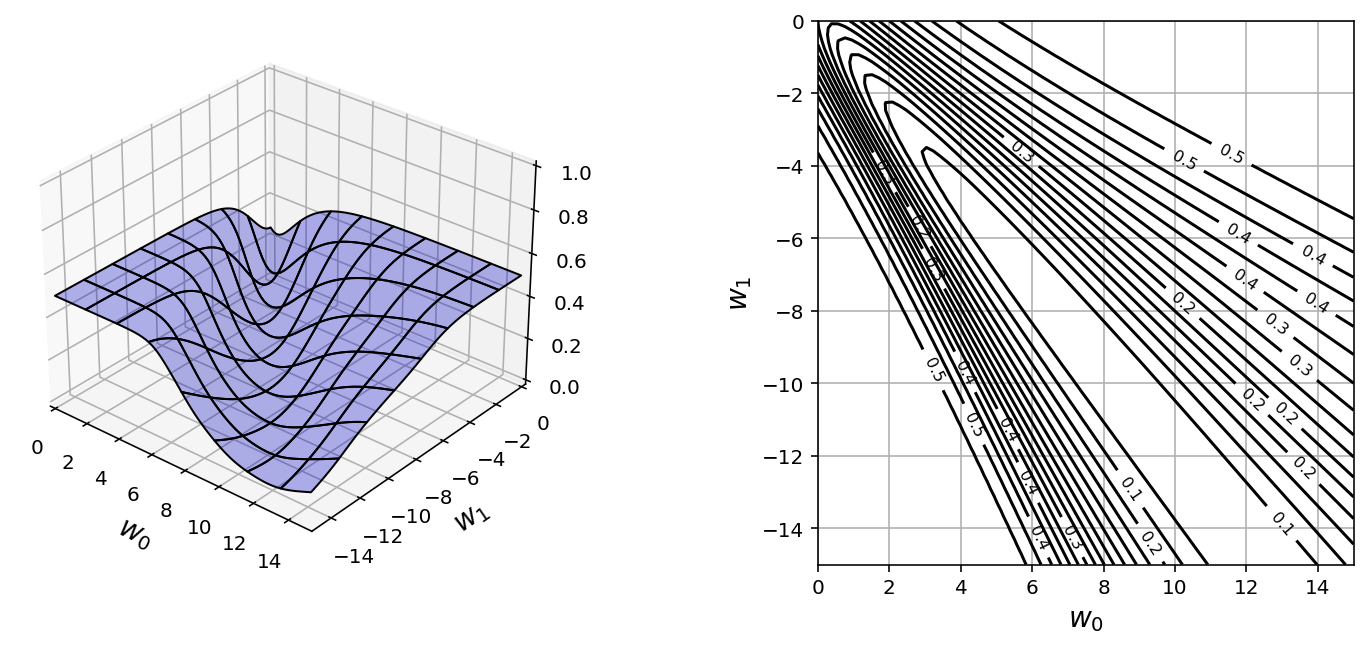

In [11]:
wn = 80
w_range = np.array([[0, 15],[-15,0]])
w0 = np.linspace(w_range[0,0], w_range[0,1], wn)
w1 = np.linspace(w_range[1,0], w_range[1,1], wn)
ww0, ww1 = np.meshgrid(w0, w1)
C = np.zeros((len(w1), len(w0)))
w = np.zeros(2)
for i0 in range(wn):
    for i1 in range(wn):
        w[0] = w0[i0]
        w[1] = w1[i1]
        C[i1, i0] = mse_logistic(w, X, T)


plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1,2,1, projection='3d')
ax.plot_surface(ww0, ww1, C, color='blue', edgecolor='k',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 1)
ax.view_init(30, -50)

plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, C, 20, colors='black')
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

## Learning model of Logistic Regression
- **로지스틱 회귀모델**  
$y = \sigma(w_0x+w_1) = \cfrac{1}{1+e^{-(w_0x+w_1)}}$

- **평균 교차 엔트로피 오차 함수**  
$E(\textbf{w}) = -\cfrac{1}{N}\log P(\textbf{T}|\textbf{X}) = \cfrac{1}{N}\sum \limits_{n=0}^{N-1}E_n(\textbf{w}) \qquad \text{where} \qquad E_n(\textbf{w}) = -t_n\log y_n-(1-t_n)\log (1-y_n)$

- **학습 규칙에 사용하는 편미분**  
$\rightarrow \cfrac{\partial E}{\partial w_0} = \cfrac{1}{N}\sum\limits_{n=0}^{N-1}(y_n-t_n)x_n \qquad
 \cfrac{\partial E}{\partial w_1} = \cfrac{1}{N}\sum\limits_{n=0}^{N-1}(y_n-t_n)$